<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
This kernel is the continuation of **[30 Days of EDA](https://www.kaggle.com/discussions/general/442602)** learning series.This will be final notebook of the series and will take you two lesser known but very powerful techniques that will help **(A)** missing value imputation and **(B)** identifying non-linear relationship

If you are new here, you might want to check out previous kernels: 
    
- **[30 days of EDA - Week I](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-i)** 
- **[30 days of EDA - Week II](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-ii)**.
- **[30 days of EDA - Week III](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-iii)**.
- **[30 days of EDA - Week IV](https://www.kaggle.com/code/prasad22/30-days-of-eda-week-iv)**.    
    
 
    
<h1 align="left"><font color=orange> Table of Contents</font></h1>

<h2 align="left"><font color=violet> Week V</font></h2>

- [Day 29 : MissForest](#Day-29-:-MissForest)
- [Day 30 : Predictive Power Score](#Day-30-:-Predictive-Power-Score)
  

# **<span style='color:skyblue'>Day 29 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> MissForest</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

In Week, I have covered ways with which we can deal with missing values on Day 6 and Day 7 with manual imputations by mean, median etc as well as sklearn's inbuilt imputer respectively. Today we will cover a more robust and highly precise way of missing value imputation technique provided by **MissForest library**. 
    
We will explore this library on [**Mumbai Local Train Dataset**](https://www.kaggle.com/datasets/prasad22/mumbai-local-train-dataset)!   

In [1]:
import pandas as pd
!pip install MissForest
from missforest.missforest import MissForest
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Issues with replacing (imputing) missing values with mean or zero or any other fixed value:
- alters summary statistics
- changes the distribution
- inflates the presence of a specific value

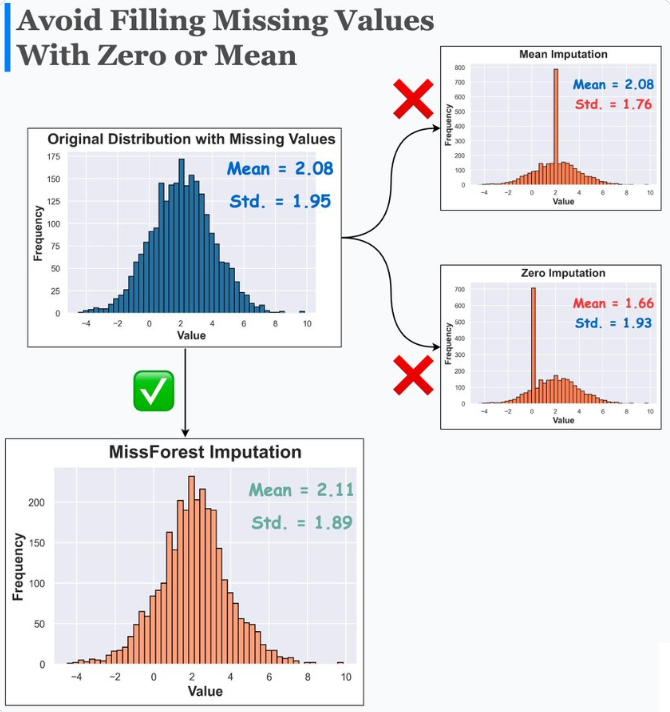

In [2]:
Image("/kaggle/input/miss-forest/miss_forest.png") #Source-DailyDoseOFDS

In [3]:
#Loading Mumbai Local Train Dataset
mum_local = pd.read_csv("/kaggle/input/mumbai-local-train-dataset/Mumbai Local Train Dataset.csv",encoding="Latin-1")
mum_local.isna().sum() #Checking Missing values

Station                                  0
Station Code                             0
Line                                     0
Distance From Previous of the Line       0
Time taken From Previous of the Line     0
About                                    0
Platforms                                5
Tracks                                   9
Year of Opening                         14
dtype: int64

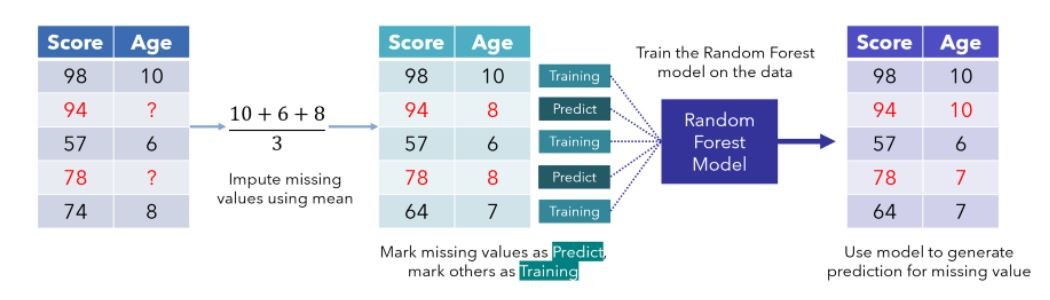

In [4]:
#How MissForest works
Image("/kaggle/input/missforest2/missforest.JPG") #Source - Andre Ye

In [5]:
mf = MissForest()
df_imputed = mf.fit_transform(mum_local)
df_imputed.isna().sum()

Station                                 0
Station Code                            0
Line                                    0
Distance From Previous of the Line      0
Time taken From Previous of the Line    0
About                                   0
Platforms                               0
Tracks                                  0
Year of Opening                         0
dtype: int64

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
## Advantages
- It can work with mixed data, both numerical and categorical
- Miss Forest can handle outliers, so there is no need for feature scaling.
- Random Forests have inherent feature selection, which makes them robust to noisy data.
- It can handle non-linearity in data

## Disadvantages
- Multiple trees need to be constructed for each iteration, and it becomes computationally expensive when the number of predictors and observations increases.
- Also, it’s an algorithm, not a model object, meaning it must be run every time data is imputed, which could be problematic in some production environments.
    
Another interesting imputation method is the Mice algorithm stands for Multiple Imputation By Chained Equation. Technically any predictive model can be used with mice for imputation. Here we will be using LIghtGBM for prediction. And this is more or less similar to miss forest as far as pseudocode of algorithm is involved. The only difference in the package we will be dealing with is it uses a LightGBM instead of a  pure Random Forest. 

For more details read blogpost titled: **Handling Missing Values with Random Forest** on AnalyticsVidhya   

([Table of Contents](#-Table-of-Contents))

# **<span style='color:skyblue'>Day 30 </span><span style='color:violet'><b>:</b></span><span style='color:lightgreen'> Predictive Power Score</span>**

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

Correlation matrix has quite few flaws in its execution to identify relationships between variables.Such as
- the correlation is only defined for the numerical columns. So, we leave out all the categorical columns.
- The same will happen if you transform the categorical columns because they are not ordinal and if we do OneHotEncoding we will end up with an array with many different values (with high cardinality).
- The symmetry in the correlations means that the correlation is the same whether we calculate the correlation of A and B or the correlation of B and A. However, relationships in the real world are rarely symmetrical. More often, relationships are asymmetrical.Example: a column with 2 unique values (True or False for example) will never be able to perfectly predict another column with 100 unique values. But the opposite could be true. Clearly, asymmetry is important because it is very common in the real world.
    
**Predictive Power Score** library that tells us if there is any relationship between two columns — no matter if the relationship is linear, non-linear, Gaussian, or some other type of relationship.The score is asymmetrical between two variables.PPS handles both categorical and numerical columns. 
    
Lets analyze [**Titanic Dataset**](https://www.kaggle.com/c/titanic) using Predictive Power Score    

In [6]:
!pip install ppscore
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Loading Titanic Dataset
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")

In [8]:
def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax


def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

<Axes: title={'center': 'PPS matrix'}, xlabel='feature', ylabel='target'>

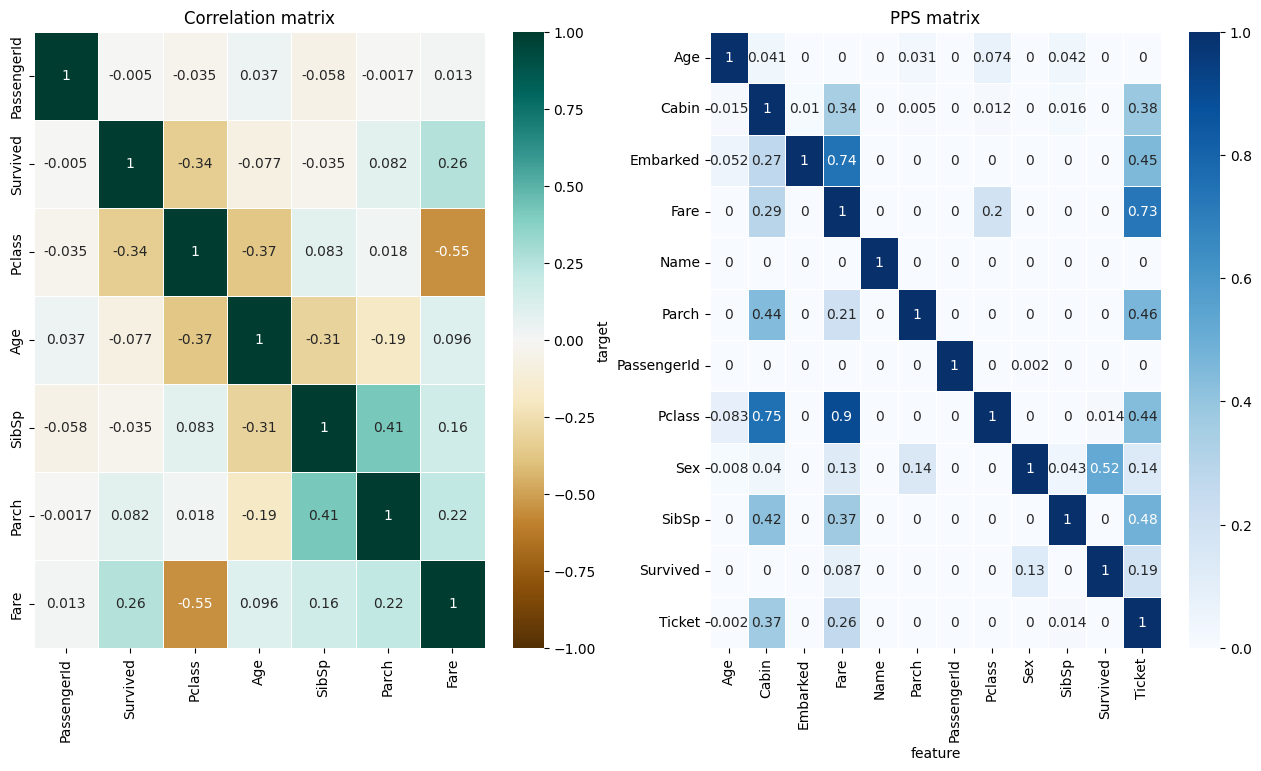

In [12]:
# Correlation Matrix
f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)
corr_heatmap(titanic.corr())

f.add_subplot(1,2, 2)
matrix = pps.matrix(titanic)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
heatmap(matrix.round(3))

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
We can compare both tables and see differences in outcomes.Asymentrical result is quite evident from PPS matrix along with inclusion of the variables (numeric+categorical) unlike correlation matrix.
    
For more details - [**Read Documentation**](https://pypi.org/project/ppscore/#calculation-of-the-pps)

([Table of Contents](#-Table-of-Contents))

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    

 This marks the end to this Kernel. Hope you have enjoyed the series and find it useful to your data analysis journey !
    
<h2>Thanks for reading!</h2>     